### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import openpyxl

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [6]:
lista_modelos=['DTC','RND','BAG','ADA','GBCT','LOGREG','KNN']

In [5]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [6]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model

def save_files(model):
    '''
    Grabar modelos con formato binario en una carpeta
    '''
    os.chdir('E:/Bootcamp_22/Javier/Repositorios/Machine_Learning/model')
    date=str(datetime.today().strftime('%y%m%d%H%M%S'))
    name=input("Introduce el nombre del modelo a grabar (iniciales): ")
    file=name+date+'.pickle'
    pickle.dump(model,open(file,'wb'))


Aqui vamos a cargar los modelos para pasar los test

In [7]:
ADA = load_files( 'ADA220924191105.pickle' ) 
BAG = load_files( 'BAG220924191109.pickle' ) 
DTC = load_files( 'DTC220924191112.pickle' ) 
GBCT = load_files( 'GBCT220924191130.pickle' ) 
KNN = load_files( 'KNN220924191142.pickle' ) 
LOGREG = load_files( 'LOGREG220924191139.pickle' ) 
RND = load_files( 'RND220924191119.pickle' ) 

A partir de aqui tengo que cambiar las siguientes ordenes para cargar los modelos

### 2. CALCULATING ERROR IN EACH MODEL

In [8]:
def error_modelo(model, x_test, Y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='macro')
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='macro')
    recall_model=recall_score(y_test, y_pred,average='macro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    model_error = {'accuracy': acc_model, 'f-1': f1_model, 'recall': recall_model , 'precision': precision_model}
    df=pd.DataFrame.from_dict(model_error,orient='index')
    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, xticklabels=[10,20,30,40,50], yticklabels=[10,20,30,40,50],annot=True)
    return df


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7537195314973093
F1 0.4470204877067017
Precision 0.4794261669174011
Recall 0.45507374951289903
------------------------------
ROC 0.6198167879381712


,ADA
accuracy,0.753720
f-1,0.447020
recall,0.455074
precision,0.479426


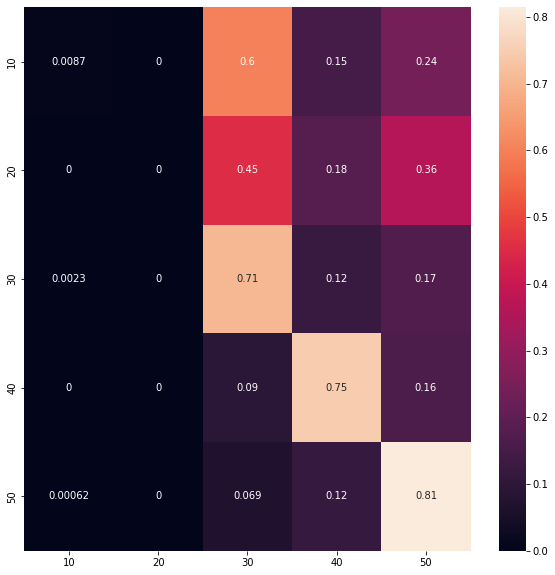

In [9]:
df_ADA= error_modelo(ADA,X_test,y_test)
df_ADA.columns=['ADA']
df_ADA

Accuracy 0.7563574970982379
F1 0.44926112518753525
Precision 0.4729848258130332
Recall 0.45848646075542643
------------------------------
ROC 0.7888479609316807


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,BAG
accuracy,0.756357
f-1,0.449261
recall,0.458486
precision,0.472985


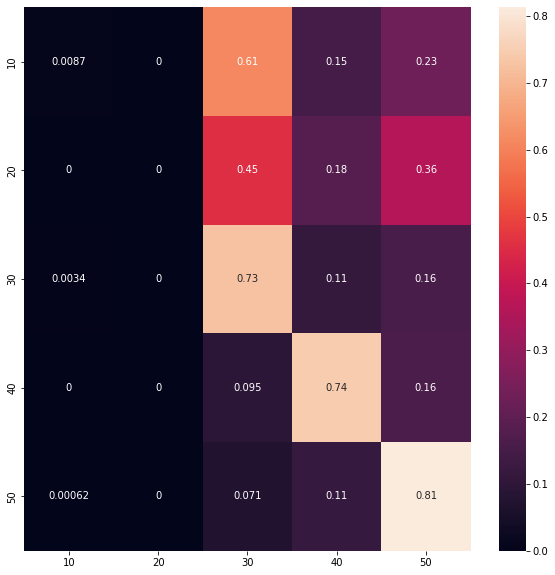

In [10]:
df_BAG = error_modelo(BAG,X_test,y_test)
df_BAG.columns=['BAG']
df_BAG

A partir de aqui tengo que cambiar las siguientes ordenes para cargar los modelos

Accuracy 0.7555133481059407
F1 0.4485520220043739
Precision 0.4671284639535143
Recall 0.4570369534043424
------------------------------
ROC 0.7784773464682482


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,DTC
accuracy,0.755513
f-1,0.448552
recall,0.457037
precision,0.467128


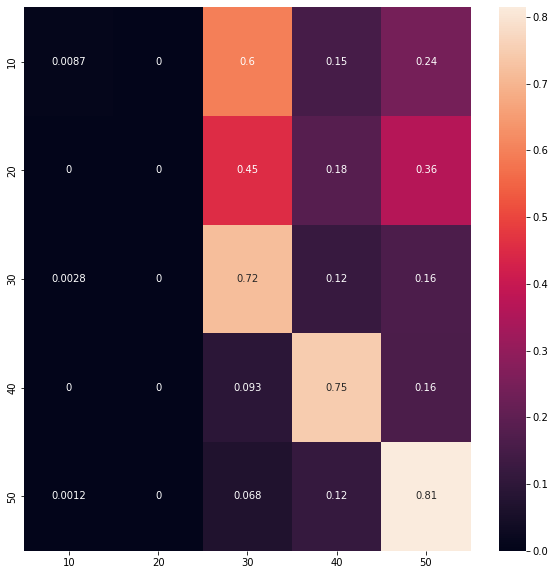

In [11]:
df_DTC = error_modelo(DTC,X_test,y_test)
df_DTC.columns=['DTC']
df_DTC

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7547747177376807
F1 0.4477520513905784
Precision 0.4802587149996495
Recall 0.4556247981797714
------------------------------
ROC 0.7806180532674533


,RND
accuracy,0.754775
f-1,0.447752
recall,0.455625
precision,0.480259


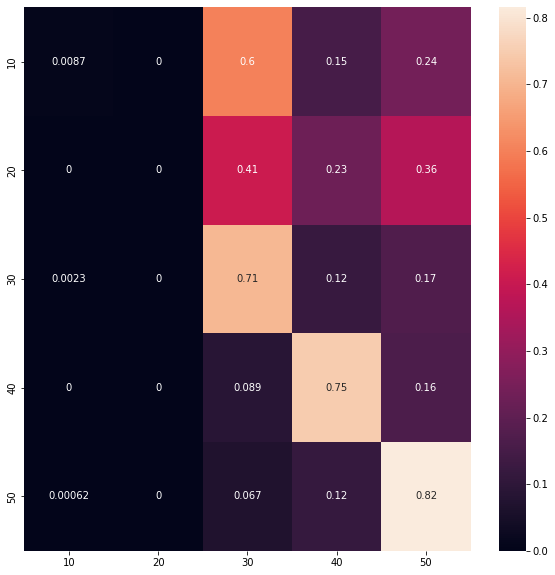

In [12]:
df_RND = error_modelo(RND,X_test,y_test)
df_RND.columns=['RND']
df_RND

Accuracy 0.7558299039780522
F1 0.44576586850927563
Precision 0.4359517957749398
Recall 0.45733785726097376
------------------------------
ROC 0.8256666950177991


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,GBCT
accuracy,0.755830
f-1,0.445766
recall,0.457338
precision,0.435952


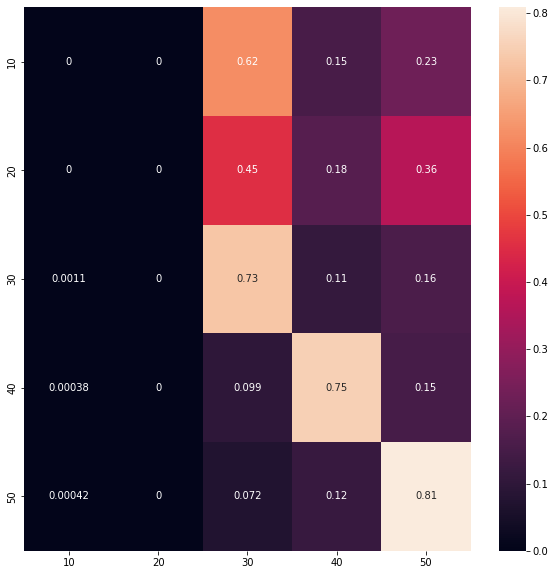

In [13]:
df_GBCT = error_modelo(GBCT,X_test,y_test)
df_GBCT.columns=['GBCT']
df_GBCT

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.2799409095705392
F1 0.1515221817137021
Precision 0.11273434898861612
Recall 0.23924113782423007
------------------------------
ROC 0.5189469301041887


,KNN
accuracy,0.279941
f-1,0.151522
recall,0.239241
precision,0.112734


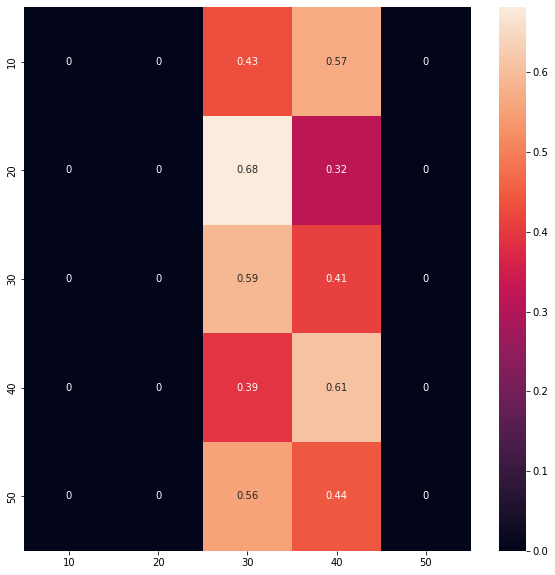

In [14]:
df_KNN = error_modelo(KNN,X_test,y_test)
df_KNN.columns=['KNN']
df_KNN

Accuracy 0.6995884773662552
F1 0.38933696072643026
Precision 0.4037144802016047
Recall 0.39039764463024257
------------------------------
ROC 0.7677671900777531


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LOGREG
accuracy,0.699588
f-1,0.389337
recall,0.390398
precision,0.403714


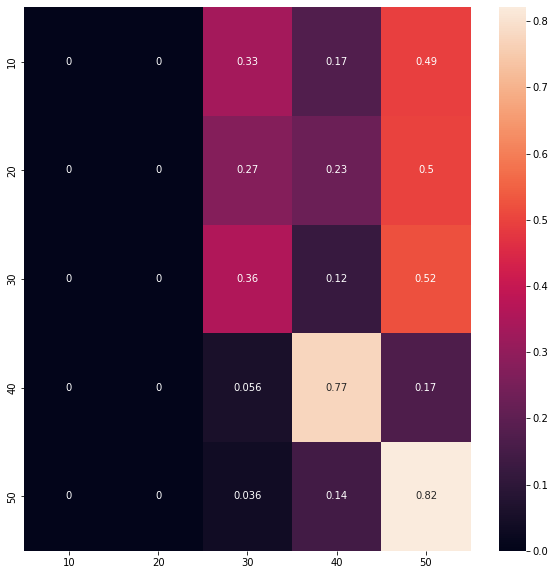

In [15]:
df_LOGREG = error_modelo(LOGREG,X_test,y_test)
df_LOGREG.columns=['LOGREG']
df_LOGREG

Viendo estos datos desechamos los modelos de *REGRESION LOGÍSTICA* y de *K NEAREST NEIGHBORS*, ya que sus métricas están alejadas del resto.

In [16]:
df_errores=pd.DataFrame()

In [17]:
df_errores=pd.concat([df_ADA,df_BAG,df_DTC,df_RND,df_GBCT,df_KNN,df_LOGREG],axis=1)
df_errores

,ADA,BAG,DTC,RND,GBCT,KNN,LOGREG
accuracy,0.753720,0.756357,0.755513,0.754775,0.755830,0.279941,0.699588
f-1,0.447020,0.449261,0.448552,0.447752,0.445766,0.151522,0.389337
recall,0.455074,0.458486,0.457037,0.455625,0.457338,0.239241,0.390398
precision,0.479426,0.472985,0.467128,0.480259,0.435952,0.112734,0.403714


In [22]:
df_errores.to_excel(r'E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\resources\img\df_errores.xls',sheet_name='errores_sin_regularizar',index=True,header=True)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


### 3. LOOKING FOR THE BEST MODEL

In [21]:
pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier())                #Aqui da igual que clasificador los que se utilizan son los que vienen después, pero hay que poner uno
])

ada_params = {
    'classifier': [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))],               # Clasificador  1
    'classifier__n_estimators': np.arange(0,200,50),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__algorithm': ['SAMME','SAMME.R']   
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],               # Clasificador  2
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__min_samples_split': np.arange(5,30,5)
}

DTC_params = {
    'classifier': [DecisionTreeClassifier()],                           # Clasificador  3
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__min_samples_split': np.arange(5,30,5)
}

bag_params = {
    'classifier': [BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))],                           # Clasificador  3
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__max_samples': np.arange(0,200,50),
    'classifier__n_estimators': np.arange(0,200,50)
}

GB_params = {
    'classifier': [GradientBoostingClassifier()],                           # Clasificador  3
    'classifier__criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__warm_start': [True, False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__min_samples_split': np.arange(5,30,5),
    'classifier__n_estimators': np.arange(0,200,50)
}

search_space = [
    ada_params,
    random_forest_params,
    DTC_params,
    bag_params,
    GB_params
]



In [22]:
my_model = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5,
                  scoring='f1_micro')

In [17]:
my_model.fit(X_train, y_train)
print(my_model.best_estimator_)
print(my_model.best_score_)
print(my_model.best_params_)

NameError: name 'my_model' is not defined

### 4. CALCULATING ERROR IN EACH MODEL

**ADA**

In [ ]:
ada_params = {
    'n_estimators': np.arange(1,200,50),                                # hacerlo o mano y ver si consigo mejores resultados
    'learning_rate': np.arange(0.01,0.1,0.02),
    'algorithm': ['SAMME','SAMME.R']   
}

GS_ADA = GridSearchCV(estimator = ADA,
                  param_grid = ada_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 5,
                  scoring='f1_macro',
#                  error_score='raise'
                    )

GS_ADA.fit(X_train, y_train)
print(GS_ADA.best_estimator_)
print(GS_ADA.best_score_)
print(GS_ADA.best_params_)

Según estos datos habría que realizar un nuevo GS modificando el parámetro *learning_rate* disminuyendo el rango.

In [ ]:
save_files(GS_ADA.best_estimator_)

In [ ]:
df_GS_ADA= error_modelo(GS_ADA.best_estimator_, X_test, y_test)
df_GS_ADA.columns=['ADA']
df_GS_ADA

**BAG**

In [ ]:
bag_params = {
    'bootstrap': [True,False],                              # hacerlo o mano y ver si consigo mejores resultados
    'warm_start': [True,False],
    'max_features': np.arange(3,5,1),
    'max_samples': np.arange(125,175,25),
    'n_estimators': np.arange(125,175,25)
}

GS_BAG = GridSearchCV(estimator = BAG,
                  param_grid = bag_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 5,
                  scoring='f1_micro')

GS_BAG.fit(X_train, y_train)
print(GS_BAG.best_estimator_)
print(GS_BAG.best_score_)
print(GS_BAG.best_params_)


In [ ]:
save_files(GS_BAG.best_estimator_)

In [ ]:
df_GS_BAG = error_modelo(GS_BAG.best_estimator_, X_test, y_test)
df_GS_BAG.columns=['BAG']

**DTC**

In [ ]:
DTC_params = {
#    'max_leaf_nodes': np.arange(1,50,5),                    # hacerlo o mano y ver si consigo mejores resultados
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(1,5,1),
    'max_features': np.arange(3,5,1),
    'min_samples_leaf': np.arange(0.05,0.15,0.05),
    'min_samples_split': np.arange(3,7,1)
}

GS_DTC = GridSearchCV(estimator = DTC,
                  param_grid = DTC_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 3,
                  scoring='f1_micro')

GS_DTC.fit(X_train, y_train)
print(GS_DTC.best_estimator_)
print(GS_DTC.best_score_)
print(GS_DTC.best_params_)

In [ ]:
save_files(GS_DTC.best_estimator_)

In [ ]:
df_GS_DTC = error_modelo(GS_DTC.best_estimator_, X_test, y_test)
df_GS_DTC.columns=['DTC']

**RND**

In [ ]:
random_forest_params = {                            # pendiente de volver a realizarlo
    'max_leaf_nodes': [5,6,7],
#    'criterion': ['gini','entropy'],
    'max_depth': [2,3,4],
    'max_features': [3,4],
#    'min_samples_leaf': [0.05,0.1,0.15],
#    'bootstrap': [True,False],
#    'warm_start': [True,False],
    'min_samples_split': [2 ,5,15,20]
}

GS_RND = GridSearchCV(estimator = RND,
                  param_grid = random_forest_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  cv = 3,
#                  error_score='raise',
                  scoring='f1_micro')

GS_RND.fit(X_train, y_train)
print(GS_RND.best_estimator_)
print(GS_RND.best_score_)
print(GS_RND.best_params_)

In [ ]:
save_files(GS_RND.best_estimator_)

In [ ]:
df_GS_RND = error_modelo(GS_RND.best_estimator_, X_test, y_test)
df_GS_RND.columns=['RND']

**GBCT**

In [ ]:
GB_params = {                                                                       # He reducido cantiddad de valores para repetirlo y ver si lo hace 
#    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth': np.arange(1,11,5),
    'warm_start': [True, False],
    'max_features': np.arange(2,5,2),
    'learning_rate': np.arange(0.05,0.55,0.25),
    'min_samples_split': np.arange(5,30,10),
    'n_estimators': np.arange(100,200,50)
}

GS_GBCT = GridSearchCV(estimator = GBCT,
                  param_grid = GB_params,
#                  n_jobs = -1,              #Cuantos procesadores se utilizan, -1 es el maximo
                  error_score='raise',
                  cv = 3,
                  scoring='f1_micro')

GS_GBCT.fit(X_train, y_train)
print(GS_GBCT.best_estimator_)
print(GS_GBCT.best_score_)
print(GS_GBCT.best_params_)

In [ ]:
save_files(GS_GBCT.best_estimator_)

In [ ]:
df_GS_GBCT = error_modelo(GS_GBCT.best_estimator_, X_test, y_test)
df_GS_GBCT.columns=['GBCT']

Salvo el modelo **ADA Boost** ninguno de los modelos mejora con un *GridSearch*, es por ello que vamos a hacer un último intento de mejorar los modelos "a mano".

In [ ]:
df_errores_GS=pd.concat([df_GS_ADA,df_GS_BAG,df_GS_DTC,df_GS_RND,df_GS_GBCT],axis=1)
df_errores_GS

### 5. CALCULATING ERROR IN HANDMADE MODEL

In [32]:
ADA = load_files('ADA220909190844.pickle')
BAG = load_files('BAG220909190839.pickle')
DTC = load_files('DTC220909190809.pickle')
GBCT=load_files('GBCT220909190855.pickle')
RND=load_files('RND220909190829.pickle')

FileNotFoundError: [Errno 2] No such file or directory: 'ADA220909190844.pickle'

**ADA BOOST**

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.756463015722275
F1 0.4474528477151239
Precision 0.4764974691991732
Recall 0.45719890932754803
------------------------------
ROC 0.7847969219180293


,HD_ADA
accuracy,0.756463
f-1,0.447453
recall,0.457199
precision,0.476497


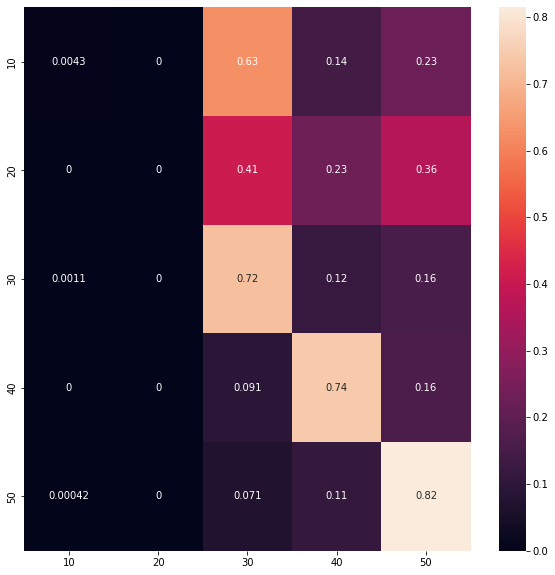

In [25]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=7,random_state=seed)
ADA_m=AdaBoostClassifier(base_estimator = estimator,n_estimators=100,
                             random_state=seed,learning_rate=0.02)
ADA_m.fit(X_train, y_train)

df_HD_ADA= error_modelo(ADA_m, X_test, y_test)
df_HD_ADA.columns=['HD_ADA']
df_HD_ADA

Se observa  que se consigue que el f1-score ascienda *0.005 puntos* manipulando manualmente los hiperparámetros del módelo.

**BAG**

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7562519784742007
F1 0.44564710547786
Precision 0.4360257605672741
Recall 0.4569071067115821
------------------------------
ROC 0.8092189557225791


,HD_BAG
accuracy,0.756252
f-1,0.445647
recall,0.456907
precision,0.436026


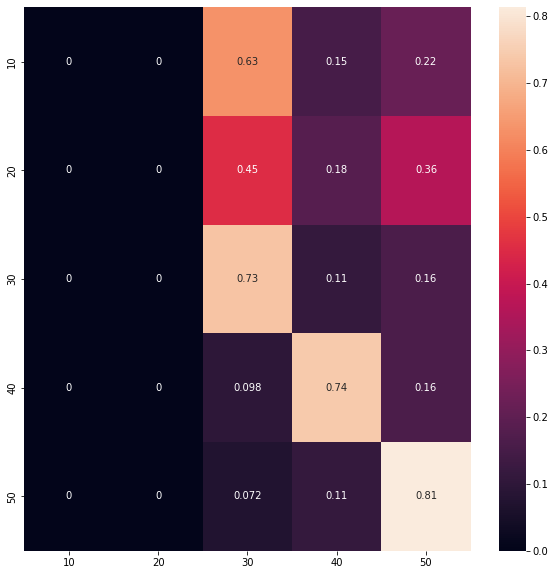

In [26]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=9,random_state=seed)
BAG_m=BaggingClassifier(base_estimator = estimator,random_state=seed,max_features=4,n_estimators=250,max_samples=500)
#        AdaBoostClassifier(base_estimator = estimator,n_estimators=100,
#                             random_state=seed,learning_rate=0.01)
BAG_m.fit(X_train, y_train)

df_HD_BAG= error_modelo(BAG_m, X_test, y_test)
df_HD_BAG.columns=['HD_BAG']
df_HD_BAG

Se observa  que se consigue que el f1-score ascienda *0.004 puntos* manipulando manualmente los hiperparámetros del módelo.

**DTC**

Accuracy 0.757201646090535
F1 0.4518404338762497
Precision 0.4675821347478489
Recall 0.46093648401515586
------------------------------
ROC 0.7777771313946426


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,HD_DTC
accuracy,0.757202
f-1,0.451840
recall,0.460936
precision,0.467582


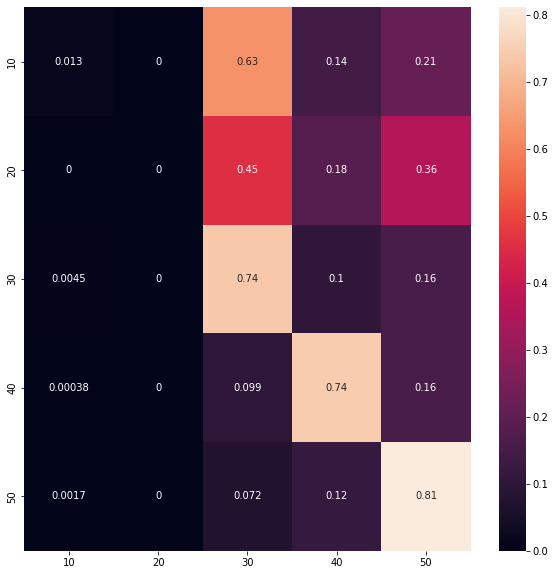

In [27]:
seed= 20
DTC_m=DecisionTreeClassifier(random_state=seed,max_depth=8,min_samples_leaf =50)
DTC_m.fit(X_train, y_train)

df_HD_DTC= error_modelo(DTC_m, X_test, y_test)
df_HD_DTC.columns=['HD_DTC']
df_HD_DTC

Se observa  que se consigue que el f1-score ascienda *0.002 puntos* manipulando manualmente los hiperparámetros del módelo.

**RND**

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7550912736097921
F1 0.44481283272628624
Precision 0.4355134300326019
Recall 0.45554386540199776
------------------------------
ROC 0.8093117418176098


,HD_RND
accuracy,0.755091
f-1,0.444813
recall,0.455544
precision,0.435513


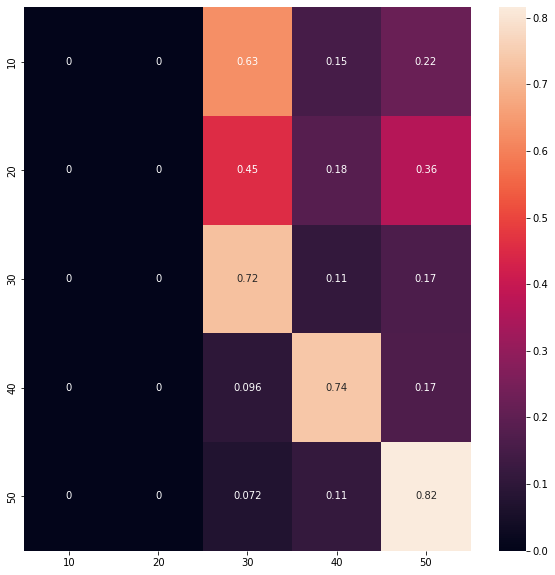

In [28]:
seed= 20

RND_m=RandomForestClassifier(random_state=seed,n_estimators=400,criterion='gini',max_samples=500,max_depth =15)
RND_m.fit(X_train, y_train)

df_HD_RND= error_modelo(RND_m, X_test, y_test)
df_HD_RND.columns=['HD_RND']
df_HD_RND

Se observa  que se consigue que el f1-score ascienda *0.003 puntos* manipulando manualmente los hiperparámetros del módelo.

**GBCT**

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7549857549857549
F1 0.4482970690676759
Precision 0.47190840899192976
Recall 0.457679488870825
------------------------------
ROC 0.8268330431201448


,HD_GBCT
accuracy,0.754986
f-1,0.448297
recall,0.457679
precision,0.471908


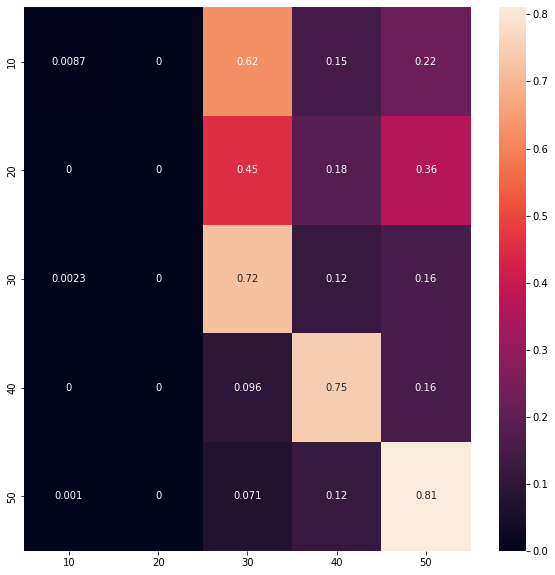

In [29]:
seed= 20

GBCT_m=GradientBoostingClassifier(n_estimators=150,random_state=seed,subsample =0.65,min_samples_leaf =80)
GBCT_m.fit(X_train, y_train)

df_HD_GBCT= error_modelo(GBCT_m, X_test, y_test)
df_HD_GBCT.columns=['HD_GBCT']
df_HD_GBCT

Se observa  que se consigue que el f1-score ascienda *0.001 puntos* manipulando manualmente los hiperparámetros del módelo.

In [30]:
df_errores_hm=pd.concat([df_HD_ADA,df_HD_BAG,df_HD_DTC,df_HD_RND,df_HD_GBCT],axis=1)
df_errores_hm

,HD_ADA,HD_BAG,HD_DTC,HD_RND,HD_GBCT
accuracy,0.756463,0.756252,0.757202,0.755091,0.754986
f-1,0.447453,0.445647,0.451840,0.444813,0.448297
recall,0.457199,0.456907,0.460936,0.455544,0.457679
precision,0.476497,0.436026,0.467582,0.435513,0.471908


In [31]:
df_errores_hm.to_excel(r'E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\resources\img\df_errores.xls',sheet_name='errores_con_regularizacion',index=True,header=True)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


save_files(BAG_m)